In [5]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import os

In [6]:
os.chdir ("C:\\Users\\saharlamuhumedhussei")
os.getcwd

<function nt.getcwd()>

In [12]:
insurance = pd.read_csv(r"C:\Users\saharlamuhumedhussei\OneDrive - HvA\Desktop\Python\Insurance.csv")


In [13]:
import pandas as pd

# Path to the csv file
file_path = r"C:\Users\saharlamuhumedhussei\OneDrive - HvA\Desktop\Python\Insurance.csv"

# Read the CSV file into a DataFrame
insurance = pd.read_csv(file_path)

# Display the data
print(insurance)


      age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]


In [16]:
import pandas as pd

# path to the CSV file
file_path = r"C:\Users\saharlamuhumedhussei\OneDrive - HvA\Desktop\Python\Insurance.csv"

# Read the CSV file into a DataFrame
insurance = pd.read_csv(file_path)

# Define age groups 
age_groups = {
    '18-30': (18, 30),
    '31-40': (31, 40),
    '41-50': (41, 50),
    '51-60': (51, 60),
    '61 and above': (61, float('inf'))
}

# Calculate the mean insurance expenses for each age group
for age_group, (min_age, max_age) in age_groups.items():
    mean_expenses = insurance[(insurance['age'] >= min_age) & (insurance['age'] <= max_age)]['expenses'].mean()
    print(f"Mean Expenses for {age_group}: {mean_expenses:.2f}")


Mean Expenses for 18-30: 9397.55
Mean Expenses for 31-40: 11639.31
Mean Expenses for 41-50: 14782.04
Mean Expenses for 51-60: 17062.29
Mean Expenses for 61 and above: 21063.16


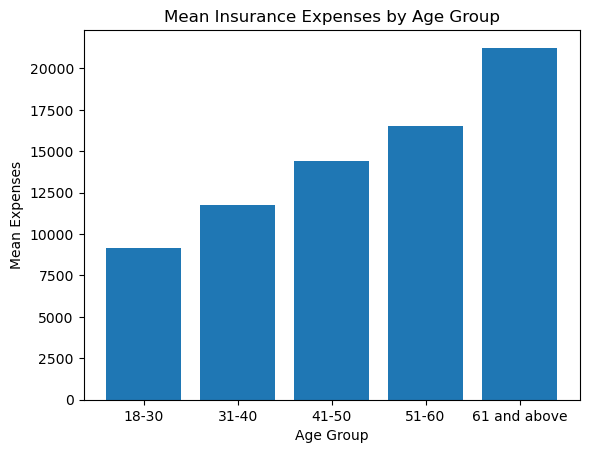

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the age group bins and labels
age_bins = [18, 30, 40, 50, 60, float('inf')]
age_labels = ['18-30', '31-40', '41-50', '51-60', '61 and above']

# Create an 'AgeGroup' column based on the age bins and labels
insurance['AgeGroup'] = pd.cut(insurance['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the mean insurance expenses for each age group
mean_expenses_by_age_group = insurance.groupby('AgeGroup')['expenses'].mean()

# Create a bar plot
plt.bar(mean_expenses_by_age_group.index, mean_expenses_by_age_group)
plt.xlabel('Age Group')
plt.ylabel('Mean Expenses')
plt.title('Mean Insurance Expenses by Age Group')
plt.show()


In [4]:
import pandas as pd
from scipy import stats

# Define age groups
age_groups = {
    '18-30': (18, 30),
    '31-40': (31, 40),
    '41-50': (41, 50),
    '51-60': (51, 60),
    '61 and above': (61, float('inf'))
}

grouped_data = []

for group, age_range in age_groups.items():
    group_data = insurance[(insurance['age'] >= age_range[0]) & (insurance['age'] <= age_range[1])]['expenses']
    grouped_data.append(group_data)

# Perform an ANOVA test
f_statistic, p_value = stats.f_oneway(*grouped_data)

alpha = 0.05  # Set your significance level

# Print the results in an ANOVA-specific format
print("One-way ANOVA Test")
print(f'F-statistic: {f_statistic:.2f}')
print(f'p-value: {p_value:.4f}')

if p_value < alpha:
    print("Result: There is significant evidence to reject the null hypothesis (Ha): Age does have an effect on insurance expenses.")
else:
    print("Result: Fail to reject the null hypothesis (H0): Age does not have an effect on insurance expenses.")


One-way ANOVA Test
F-statistic: 32.29
p-value: 0.0000
Result: There is significant evidence to reject the null hypothesis (Ha): Age does have an effect on insurance expenses.
